In [1]:
seed = 42  # for reproducibility

import pickle
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["axes.grid"] = False
%matplotlib inline

import os
import sys
from pathlib import Path
import torch
import torch.nn.functional as F
from torchvision.utils import make_grid, save_image
from sklearn.metrics import plot_confusion_matrix
torch.manual_seed(seed)
sys.path.append(str(Path().absolute().parent))
plt.style.use('seaborn')

In [2]:
exp_path = Path().absolute().parent.parent.joinpath('src/experiments/0040_2centersINBRCMMD_1epr30fr_BALANCED_ResNet18')
clog_path = 'experiments/0041_2centersINBRCMMD_1epr30fr_BALANCED_ResNet18Client_Logs'
# stge_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/stge')
# jarv_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/jarv')
# bcdr_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/bcdr')
inbreast_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/inbreast')
cmmd_path = Path().absolute().parent.parent.joinpath(f'src/{clog_path}/client_logs/cmmd')

In [3]:
pickle_file = 'log.pkl'
with open(exp_path.joinpath(pickle_file), 'rb') as handle:
    aggregated_metrics = pickle.load(handle)
    
# with open(stge_path.joinpath(pickle_file), 'rb') as handle:
#     stge_metrics = pickle.load(handle)
# with open(jarv_path.joinpath(pickle_file), 'rb') as handle:
#     jarv_metrics = pickle.load(handle)
    
with open(inbreast_path.joinpath(pickle_file), 'rb') as handle:
    inbreast_metrics = pickle.load(handle)
    
# with open(bcdr_path.joinpath(pickle_file), 'rb') as handle:
#     bcdr_metrics = pickle.load(handle)
    
with open(cmmd_path.joinpath(pickle_file), 'rb') as handle:
    cmmd_metrics = pickle.load(handle)

In [4]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

# Accuracies, 5 folds, 100 epochs. Average so that you get 1,100 np array (averaged across folds)

In [5]:
aggregated_metrics.keys()

dict_keys(['accuracies_aggregated', 'total_val_loss', 'time_spent'])

In [6]:
aggregated_metrics['accuracies_aggregated']

[0.5878378378378378,
 0.6228603603603604,
 0.6273648648648649,
 0.6296171171171172,
 0.6453828828828829,
 0.5730855855855856,
 0.6216216216216216,
 0.6259009009009009,
 0.6668918918918919,
 0.6940315315315315,
 0.7395270270270271,
 0.7121621621621621,
 0.6996621621621621,
 0.7019144144144144,
 0.7382882882882883,
 0.6861486486486486,
 0.7315315315315316,
 0.7121621621621621,
 0.7279279279279279,
 0.7768018018018018,
 0.7619369369369369,
 0.8074324324324325,
 0.8074324324324325,
 0.8346846846846847,
 0.8221846846846848,
 0.8221846846846848,
 0.8233108108108108,
 0.8244369369369369,
 0.8244369369369369,
 0.8369369369369369]

In [7]:
inbreast_metrics['local_loss']

{0: [1.0250273942947388],
 1: [0.9831351637840271],
 2: [0.8467855453491211],
 3: [1.0499238967895508],
 4: [1.0051518678665161],
 5: [1.0329302549362183],
 6: [1.0176903009414673],
 7: [1.6005626916885376],
 8: [1.2282143831253052],
 9: [0.8776241540908813],
 10: [1.5790880918502808],
 11: [0.607383668422699],
 12: [1.854941964149475],
 13: [1.694337248802185],
 14: [1.3247747421264648],
 15: [1.7109087705612183],
 16: [1.8120794296264648],
 17: [0.9842433333396912],
 18: [1.4843031167984009],
 19: [2.167304515838623],
 20: [1.929559350013733],
 21: [2.3699424266815186],
 22: [2.6508142948150635],
 23: [2.262929677963257],
 24: [1.4711381196975708],
 25: [1.205748200416565],
 26: [1.1510353088378906],
 27: [1.1254578828811646],
 28: [1.152430534362793],
 29: [1.1044358015060425],
 30: []}

In [8]:
inbreast_metrics['local_val_loss']

{0: 0.7532233148813248,
 1: 0.7171616554260254,
 2: 0.8269033133983612,
 3: 0.9175925850868225,
 4: 0.9197969883680344,
 5: 1.2005276381969452,
 6: 1.1010010540485382,
 7: 1.2779899090528488,
 8: 1.3536556959152222,
 9: 1.0569079965353012,
 10: 0.896208755671978,
 11: 1.1228032112121582,
 12: 1.165286049246788,
 13: 1.2402624413371086,
 14: 0.7995927035808563,
 15: 1.3036684691905975,
 16: 1.2418589740991592,
 17: 0.9430922865867615,
 18: 1.0057401359081268,
 19: 1.0164067894220352,
 20: 0.8334678411483765,
 21: 0.6513715833425522,
 22: 0.5810611397027969,
 23: 0.5215684026479721,
 24: 0.5050681829452515,
 25: 0.49551237374544144,
 26: 0.48838409781455994,
 27: 0.479160413146019,
 28: 0.46978577971458435,
 29: 0.4599814936518669,
 30: []}

In [9]:
cmmd_metrics['local_loss']

{0: [0.7607407569885254],
 1: [0.7201429605484009],
 2: [0.5288658142089844],
 3: [0.4744926691055298],
 4: [1.0259356498718262],
 5: [1.4584696292877197],
 6: [0.07895219326019287],
 7: [0.13335080444812775],
 8: [0.008952711708843708],
 9: [0.01162552647292614],
 10: [0.004942524246871471],
 11: [0.11271743476390839],
 12: [0.02313053049147129],
 13: [0.005217208527028561],
 14: [0.2239742875099182],
 15: [0.0021620704792439938],
 16: [0.006628942675888538],
 17: [0.14571744203567505],
 18: [0.0019345531472936273],
 19: [0.003070745849981904],
 20: [0.0017829855205491185],
 21: [0.0034393027890473604],
 22: [0.0012782271951436996],
 23: [0.0010519656352698803],
 24: [0.0009202342480421066],
 25: [0.000846103357616812],
 26: [0.0007831722032278776],
 27: [0.0007305407198145986],
 28: [0.0006968280649743974],
 29: [0.0006626994581893086],
 30: []}

In [11]:
cmmd_metrics['LMLD_val_accuracy']

[0.6644144144144144,
 0.713963963963964,
 0.7364864864864865,
 0.7274774774774775,
 0.7612612612612613,
 0.6621621621621622,
 0.7252252252252253,
 0.795045045045045,
 0.7792792792792793,
 0.8085585585585585,
 0.8063063063063063,
 0.8243243243243243,
 0.8175675675675675,
 0.8220720720720721,
 0.8333333333333334,
 0.7882882882882883,
 0.8108108108108109,
 0.8198198198198198,
 0.8513513513513513,
 0.8468468468468469,
 0.8693693693693694,
 0.8626126126126126,
 0.8738738738738738,
 0.8693693693693694,
 0.8693693693693694,
 0.8693693693693694,
 0.8716216216216216,
 0.8716216216216216,
 0.8738738738738738,
 0.8738738738738738]

## Curve

In [12]:
[cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)]

[0.7607407569885254,
 0.7201429605484009,
 0.5288658142089844,
 0.4744926691055298,
 1.0259356498718262,
 1.4584696292877197,
 0.07895219326019287,
 0.13335080444812775,
 0.008952711708843708,
 0.01162552647292614,
 0.004942524246871471,
 0.11271743476390839,
 0.02313053049147129,
 0.005217208527028561,
 0.2239742875099182,
 0.0021620704792439938,
 0.006628942675888538,
 0.14571744203567505,
 0.0019345531472936273,
 0.003070745849981904,
 0.0017829855205491185,
 0.0034393027890473604,
 0.0012782271951436996,
 0.0010519656352698803,
 0.0009202342480421066,
 0.000846103357616812,
 0.0007831722032278776,
 0.0007305407198145986,
 0.0006968280649743974,
 0.0006626994581893086]

In [13]:
cmmd_losses_local = np.array([cmmd_metrics['local_loss'][i][0] for i in range(len(cmmd_metrics['local_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_loss'][i][0] for i in range(len(inbreast_metrics['local_loss'])-1)])
# stge_losses_local = np.array([stge_metrics['local_loss'][i][0] for i in range(len(stge_metrics['local_loss'])-1)])
# jarv_losses_local = np.array([jarv_metrics['local_loss'][i][0] for i in range(len(jarv_metrics['local_loss'])-1)])
# bcdr_losses_local = np.array([bcdr_metrics['local_loss'][i][0] for i in range(len(bcdr_metrics['local_loss'])-1)])
steps = range(len(cmmd_losses_local))

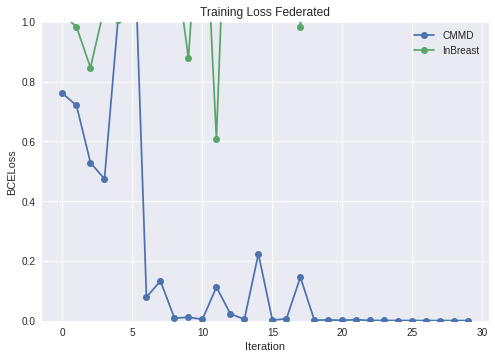

In [14]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
# plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
# plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
# plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Training Loss Federated')
plt.savefig('./plots/train_loss_per_center_30EPR1FR_2centers.png')

In [15]:
cmmd_metrics['local_val_loss']

{0: 0.6056248121791415,
 1: 0.5683872825569577,
 2: 0.5470563805765576,
 3: 0.5623889548910989,
 4: 0.5648654739061991,
 5: 0.8000611268811756,
 6: 0.6219861267341508,
 7: 0.5442484074168735,
 8: 0.5623965500957436,
 9: 0.5930818895498912,
 10: 0.5824651755392551,
 11: 0.5885995600786474,
 12: 0.5966185286020239,
 13: 0.6029248774362107,
 14: 0.5996480031145943,
 15: 0.7783362867931525,
 16: 0.7362980903954142,
 17: 0.6268924083146784,
 18: 0.7519851679189338,
 19: 0.578610786371347,
 20: 0.9257435041531507,
 21: 0.9325522777727908,
 22: 0.9357920812132458,
 23: 0.9354923162712819,
 24: 0.9346722799922443,
 25: 0.9347949435830945,
 26: 0.9354420234604428,
 27: 0.9364653531254994,
 28: 0.9381843503409376,
 29: 0.9398341496992443,
 30: []}

In [16]:
for i in range(len(cmmd_metrics['local_val_loss'])-1):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [17]:
[cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)]

[0.6056248121791415,
 0.5683872825569577,
 0.5470563805765576,
 0.5623889548910989,
 0.5648654739061991,
 0.8000611268811756,
 0.6219861267341508,
 0.5442484074168735,
 0.5623965500957436,
 0.5930818895498912,
 0.5824651755392551,
 0.5885995600786474,
 0.5966185286020239,
 0.6029248774362107,
 0.5996480031145943,
 0.7783362867931525,
 0.7362980903954142,
 0.6268924083146784,
 0.7519851679189338,
 0.578610786371347,
 0.9257435041531507,
 0.9325522777727908,
 0.9357920812132458,
 0.9354923162712819,
 0.9346722799922443,
 0.9347949435830945,
 0.9354420234604428,
 0.9364653531254994,
 0.9381843503409376,
 0.9398341496992443]

In [18]:
cmmd_losses_local = np.array([cmmd_metrics['local_val_loss'][i] for i in range(len(cmmd_metrics['local_val_loss'])-1)])
inbreast_losses_local = np.array([inbreast_metrics['local_val_loss'][i] for i in range(len(inbreast_metrics['local_val_loss'])-1)])
# stge_losses_local = np.array([stge_metrics['local_val_loss'][i] for i in range(len(stge_metrics['local_val_loss'])-1)])
# jarv_losses_local = np.array([jarv_metrics['local_val_loss'][i] for i in range(len(jarv_metrics['local_val_loss'])-1)])
# bcdr_losses_local = np.array([bcdr_metrics['local_val_loss'][i] for i in range(len(bcdr_metrics['local_val_loss'])-1)])
steps = range(len(cmmd_losses_local))

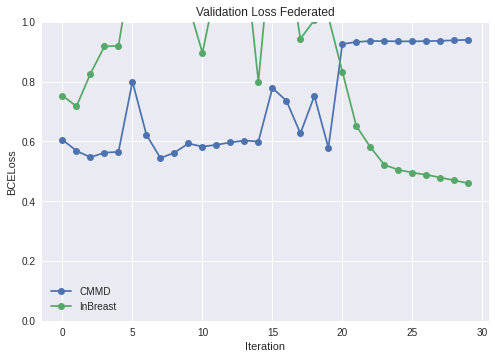

In [19]:
plt.plot(steps, cmmd_losses_local,'-o', label='CMMD')
plt.plot(steps, inbreast_losses_local,'-o', label='InBreast')
# plt.plot(steps, bcdr_losses_local,'-o', label='BCDR')
# plt.plot(steps, jarv_losses_local,'-o', label='OPTIMAM (jarv)')
# plt.plot(steps, stge_losses_local,'-o', label='OPTIMAM (stge)')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0,1)
plt.ylabel('BCELoss')
plt.title('Validation Loss Federated')
plt.savefig('./plots/val_loss_per_center_30EPR1FR_2centers.png')

In [40]:
# plt.plot(steps, aggregated_metrics,'-o', label='aggregated')
# plt.legend()
# plt.xlabel('Iteration')
# plt.ylim(0,1)
# plt.ylabel('BCELoss')
# plt.title('Training Each Center Isolation')
# plt.savefig('./plots/sanity_check_success1EPR30FR.png')

In [21]:
cmmd_metrics['LMLD_val_accuracy']

[0.6644144144144144,
 0.713963963963964,
 0.7364864864864865,
 0.7274774774774775,
 0.7612612612612613,
 0.6621621621621622,
 0.7252252252252253,
 0.795045045045045,
 0.7792792792792793,
 0.8085585585585585,
 0.8063063063063063,
 0.8243243243243243,
 0.8175675675675675,
 0.8220720720720721,
 0.8333333333333334,
 0.7882882882882883,
 0.8108108108108109,
 0.8198198198198198,
 0.8513513513513513,
 0.8468468468468469,
 0.8693693693693694,
 0.8626126126126126,
 0.8738738738738738,
 0.8693693693693694,
 0.8693693693693694,
 0.8693693693693694,
 0.8716216216216216,
 0.8716216216216216,
 0.8738738738738738,
 0.8738738738738738]

In [23]:
cmmd_metrics.keys()

dict_keys(['local_loss', 'local_val_loss', 'local_accuracy', 'local_sensitivity', 'local_specificity', 'local_val_predictions', 'GMLD_accuracy', 'GMLD_true_positives', 'GMLD_false_positives', 'GMLD_false_negatives', 'GMLD_true_negatives', 'LMLD_train_accuracy', 'LMLD_val_accuracy', 'LMLD_train_true_positives', 'LMLD_train_false_positives', 'LMLD_train_false_negatives', 'LMLD_train_true_negatives', 'LMLD_val_true_positives', 'LMLD_val_false_positives', 'LMLD_val_false_negatives', 'LMLD_val_true_negatives'])

In [29]:
accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
accuracy

[0.6277056277056277,
 0.670995670995671,
 0.7316017316017316,
 0.8008658008658008,
 0.7965367965367965,
 0.7272727272727273,
 0.7748917748917749,
 0.8701298701298701,
 0.8311688311688312,
 0.8874458874458875,
 0.8138528138528138,
 0.7965367965367965,
 0.8528138528138528,
 0.8311688311688312,
 0.7965367965367965,
 0.7878787878787878,
 0.7748917748917749,
 0.8441558441558441,
 0.8354978354978355,
 0.8398268398268398,
 0.8744588744588745,
 0.8571428571428571,
 0.8614718614718615,
 0.8614718614718615,
 0.8614718614718615,
 0.8614718614718615,
 0.8658008658008658,
 0.8701298701298701,
 0.8701298701298701,
 0.8701298701298701]

In [32]:
import sklearn

In [36]:
cmmd_accuracy = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_sensitivity = [cmmd_metrics['GMLD_true_positives'][i] / (cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
cmmd_specificity = [cmmd_metrics['GMLD_true_negatives'][i] / (cmmd_metrics['GMLD_true_negatives'][i] + cmmd_metrics['GMLD_false_positives'][i]) for i in range(len(cmmd_metrics['GMLD_true_negatives']))]
cmmd_f1 = [2 * cmmd_metrics['GMLD_true_positives'][i] / (2 * cmmd_metrics['GMLD_true_positives'][i] + cmmd_metrics['GMLD_false_positives'][i] + cmmd_metrics['GMLD_false_negatives'][i]) for i in range(len(cmmd_metrics['GMLD_true_positives']))]
# cmmd_AUC = [sklearn.metrics.roc_auc_score(cmmd_metrics['GMLD_labels'][i].detach().numpy(), cmmd_metrics['GMLD_predictions'][i].detach().numpy()) for i in range(len(cmmd_metrics['GMLD_true_positives']))]


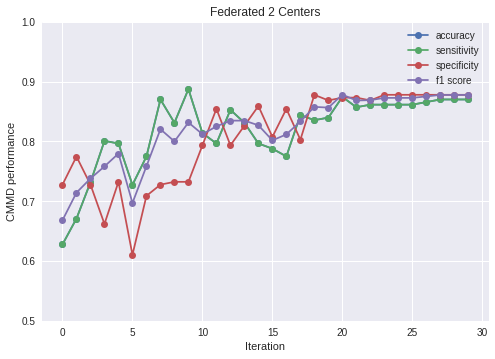

In [44]:
plt.plot(steps, cmmd_accuracy,'-o', label='accuracy')
plt.plot(steps, cmmd_sensitivity,'-o', label='sensitivity')
plt.plot(steps, cmmd_specificity,'-o', label='specificity')
plt.plot(steps, cmmd_f1,'-o', label='f1 score')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.5,1)
plt.ylabel('CMMD performance')
plt.title('Federated 2 Centers')
plt.savefig('./plots/CMMDmetrics.png')

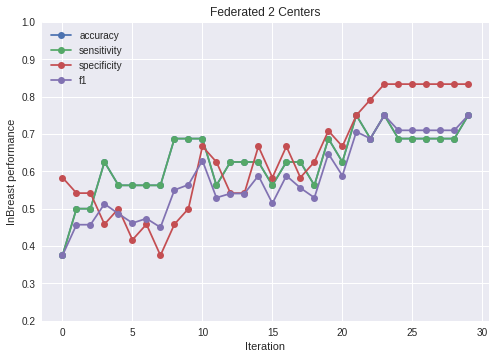

In [49]:
inbreast_accuracy = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_sensitivity = [inbreast_metrics['GMLD_true_positives'][i] / (inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]
inbreast_specificity = [inbreast_metrics['GMLD_true_negatives'][i] / (inbreast_metrics['GMLD_true_negatives'][i] + inbreast_metrics['GMLD_false_positives'][i]) for i in range(len(inbreast_metrics['GMLD_true_negatives']))]
inbreast_f1 = [2 * inbreast_metrics['GMLD_true_positives'][i] / (2 * inbreast_metrics['GMLD_true_positives'][i] + inbreast_metrics['GMLD_false_positives'][i] + inbreast_metrics['GMLD_false_negatives'][i]) for i in range(len(inbreast_metrics['GMLD_true_positives']))]

plt.plot(steps, inbreast_accuracy,'-o', label='accuracy')
plt.plot(steps, inbreast_sensitivity,'-o', label='sensitivity')
plt.plot(steps, inbreast_specificity,'-o', label='specificity')
plt.plot(steps, inbreast_f1,'-o', label='f1')
plt.legend()
plt.xlabel('Iteration')
plt.ylim(0.2,1)
plt.ylabel('InBreast performance')
plt.title('Federated 2 Centers')
plt.savefig('./plots/InBREASTmetrics.png')

# Sanity check Success!